### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.




(1) What is the independent variable? What is the dependent variable?

The independent variables are Congruent or Incongruent.

The dependent variable is time.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Ho : Null Hypothesis: ( μi - μc = 0 ) There is no significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

Ha : Alternative Hypothesis: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

The Dependent Samples t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. The different conditions are dependent because, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import os
path = os.getcwd()
print(path)
import pandas
df = pandas.read_csv(path + '/stroopdata.csv')
df

/home/workspace


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
# Perform the analysis here
# Central tendency :we want to know something about the “average” or “middle” of our data.So, I calculated mean of data here.
mean = df.mean()
print(mean)

Congruent      14.051125
Incongruent    22.015917
dtype: float64


In [4]:
mean.round(2)

Congruent      14.05
Incongruent    22.02
dtype: float64

In [5]:
#measure of variability
#Standard deviation 
std = df.std()
std.round(2)

Congruent      3.56
Incongruent    4.80
dtype: float64

In [6]:
#measure of variability
#Variance
var = df.var()
var.round(2)

Congruent      12.67
Incongruent    23.01
dtype: float64

In [7]:
df['Subject'] = df.index + 1
df

,Congruent,Incongruent,Subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


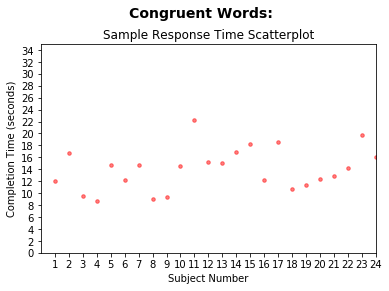

In [8]:
# Build the visualizations here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = len(df)
x = df['Subject']
y = df['Congruent']
colors = 'red'
area = np.pi * 4 

fig = plt.figure()
fig.suptitle('Congruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject Number')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

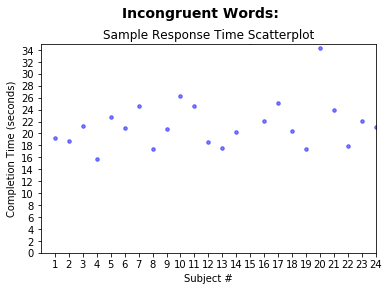

In [9]:
N = len(df)
x = df['Subject']
y = df['Incongruent']
colors = 'blue'
area = np.pi * 4 

fig = plt.figure()
fig.suptitle('Incongruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

The congruent words sample has a distribution which is between 8 and 22 seconds and has a lower average completion time compared to the incongruent words scatterplot which shows the distibtuion is between 15 to about 26 seconds with what appears to be one outlier at 35 seconds. The average completion time is definitely higher.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Confidence Level = 90%

t-critical value (Two Tails T Distribution Table) -> from http://www.statisticshowto.com/tables/t-distribution-table/

degree of freedom(df) = $n - 1 = 24$

$t_{crit} = \pm 1.711$

In [10]:
# Perform the statistical test here
# number of subjects in the sample
n = len(df)
n

24

In [11]:
# point estimate of μi - μc -> PE (in seconds)
con = df['Congruent']
incon = df['Incongruent']
c_mean = con.mean()
i_mean = incon.mean()
PE = i_mean - c_mean
round(PE,2)

7.96

In [12]:
#s - sample standard deviation of differences
#1. D = sample difference
df['D'] = df['Incongruent'] - df['Congruent']

#2. DFM = difference from the mean
#SQD = squared differences from the mean
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM

#3. SSD = sum of squared differences
SSD = df['SQD'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [13]:
#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0206999999999997

$t_{statistic} > t_{critical}$

$8.0207 > 1.711$

# Conclusion:
Thus one can **reject** the Null Hypothesis which means that there is a statistically significant differences between the population average completion time for the Congruent and Incongruent. 